# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer:  400

#### Question 2. Create a summary table

In [3]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: GRE with larger original value. In this case, shouldn't just compare the STD of gre and gpa, they with different 'units', can use coefficient of variation (divide the standard deviation by the mean).

#### Question 4. Drop data points with missing data


In [6]:
df_no_missing = df_raw.dropna()
df_no_missing.describe() ## with 397 observations left
df_no_missing.isnull().sum() ## tells me there is no missing data for each variable in the dataframe


admit       0
gre         0
gpa         0
prestige    0
dtype: int64

#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: df_no_missing.describe() ## to check how many obervations left

#### Question 6. Create box plots for GRE and GPA

{'boxes': [<matplotlib.lines.Line2D at 0x1193fff50>],
 'caps': [<matplotlib.lines.Line2D at 0x119411d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x11942e0d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x119423a50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11600edd0>,
  <matplotlib.lines.Line2D at 0x119411750>]}

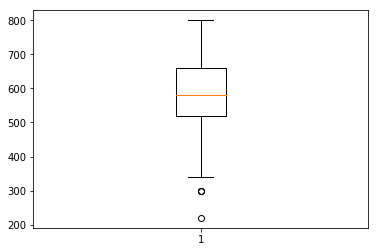

In [7]:
#boxplot 1 
plt.boxplot(df_no_missing['gre'])

{'boxes': [<matplotlib.lines.Line2D at 0x1195a0490>],
 'caps': [<matplotlib.lines.Line2D at 0x1195b02d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1195bb5d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x1195b0f50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11606d050>,
  <matplotlib.lines.Line2D at 0x1195a0c50>]}

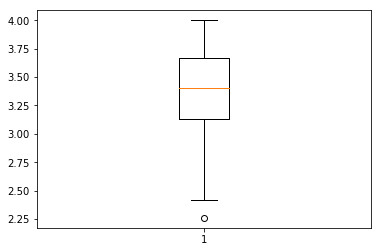

In [8]:
#boxplot 2 
plt.boxplot(df_no_missing['gpa'])

#### Question 7. What do this plots show?

Answer:
GRE with median around 580, lower quartile around 520, upper quartile around 650, with 2 outliers
GPA with median around 3.4, lower quartiel around 3.15, upper quartile around 3.60, with 1 outliers
 

#### Question 8. Describe each distribution 

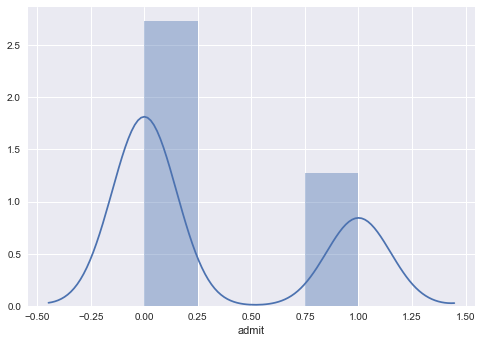

In [22]:
# plot the distribution of each variable 
import seaborn as sns
## histogram for admit
sns.distplot(df_no_missing['admit'],label='Admit')

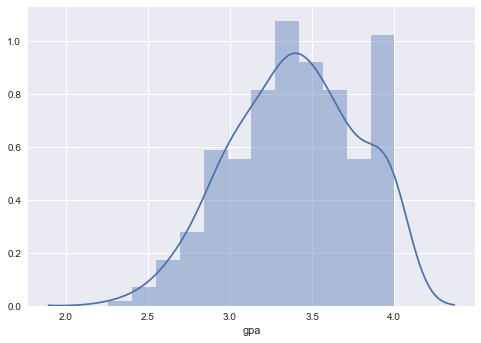

In [21]:
## histogram for gp
sns.distplot(df_no_missing['gpa'],label='GPA')

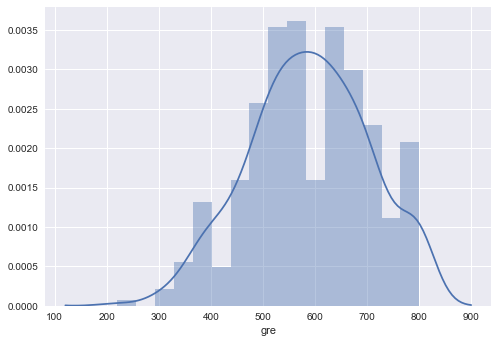

In [23]:
## histogram for gre
sns.distplot(df_no_missing['gre'],label='GRE')

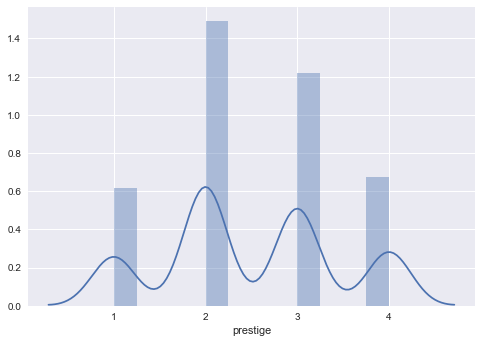

In [24]:
## histogram for prestige
sns.distplot(df_no_missing['prestige'],label='Prestige')

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No, amit only with value 0 and 1, not qualify for the linear regression assumption for the dependent variable.
        

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Maybe, gre and gpa look a little bit left skewed

#### Question 11. Which of our variables are potentially colinear? 

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


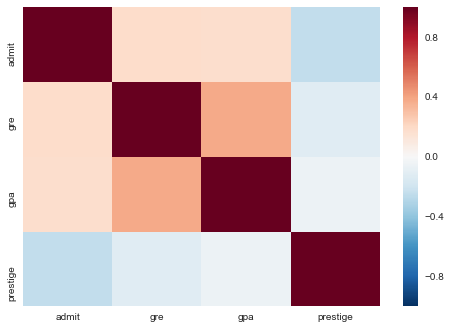

In [30]:
# create a correlation matrix for the data
corr = df_no_missing.corr()
print corr

sns.heatmap(corr)

#### Question 12. What did you find?

Answer: gre positive associate with admit, gpa, negative associate with prestige
        gpa positive associate with admit, negative associate with prestige
        prestige negative associate with admit

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Logistic regression model, 
        1) admit (Y) =  a + b1 * prestige
        2) admit (Y) =  a + b1 * prestige + b2 * gre
        3) admit (Y) =  a + b1 * prestige + b2 * gpa
        4) admit (Y) =  a + b1 * prestige + b2 * gre + b2 * gpa
        

#### Question 14. What is your hypothesis? 

Answer: 
       For univeriate model
       1) admit into graduate school positive associate with gre
       2) admit into graduate school positive associate with gpa
       3) admit into graduate school positive associate with prestige
       
       For multivariate model
       1) admit into graduate school positive associate with gre while control for gpa and prestige
       2) admit into graduate school positive associate with gpa while control for gre and prestige
       3) admit into graduate school positive associate with prestige while control for gre and gpa

## Knowledge Review Questions

1. What is test error and train error?
2. What are ways to mitigate a situation where you have low train error but high test error?
3. What are some of the parameters you can tweak to get a better fit in ordinary linear regression?
4. What package would you use to explore these parameters easily and find the best model?
5. What is the difference between Lasso and Ridge regression?
    6a. When do you use which?
6. Bonus: Explore alternatives to dropping obervations with missing data

Advanced Bonus:
1. What makes Lasso regression do what it does to the coefficients?
2. How do you deal with multi-colinearity when performing linear regression?
3. What is the "distance" formula in KNN? I.e. how does KNN account for distance to the k neighbours when predicting the class?

In [ ]:
 1. Training error is the error that you get when you run the trained model back on the training data
 Test error is the error when you get when you run the trained model on a set of data that it has 
 previously never been exposed to
    
 2. regulation

 3. If a parameter (for example BMI) is a function of one or more parameters (height, weight), then can just use the paramter Age.  
 
4.statsmodels

5.In ridge regression, the penalty is the sum of the squares of the coefficients
   for the Lasso, it is the sum of the absolute values of the coefficients
    
6a. Ridge , you can either end up including all the coefficients in the model, or none of them
     Lasso does both parameter shrinkage and variable selection automatically
6. There are many ways can do that,for example, define True or False for missing, then drop it
   I think df_no_missing = df_raw.dropna() this works fast and perfect


 Advanced Bonus:
1. Lasso, use sum of the absolute values of the coefficients this way make a shrinkage towards zero 
    using an absolute value (L1 penalty) 
    
2.Principal component analysis, ridge regression and Lasso regression

3. For continitious variable: Euclidean distance, Manhattn distance, Minkowski distance can be used
   For categorical variable: Hamming distance can be used 
            
I know you give bonus point for imputation, for my every day working experience, we prefer not do any imputation.
So I did not do any imputation here. I also only do all the analysis using the data with complete cases.